In [59]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [60]:
from src.config import setup_logging

setup_logging()

In [61]:
from src.feed.common import deduplicate_feeds
from src.feed.constants import COMMON_FEEDS

feeds = COMMON_FEEDS
content_feeds = [feed.parse_feed() for feed in feeds]
unique_feeds = deduplicate_feeds(content_feeds)

In [12]:
print(f"Number of entries across all feeds: {sum([len(f.entries) for f in unique_feeds])}")

Number of entries across all feeds: 375


In [62]:
# Only take the top 10 stories from all RSS feeds
for feed in unique_feeds:
  feed.entries = feed.entries[:10]

In [63]:
print(f"Number of entries across all feeds: {sum([len(f.entries) for f in unique_feeds])}")

Number of entries across all feeds: 60


In [66]:
from src.classifier.kmeans import KMeansClassifier

optimal_kmeans_classifier = KMeansClassifier()
optimal_kmeans_headlines = optimal_kmeans_classifier.classify(unique_feeds)

2025-10-25 23:15:19,731 - src.embedding.embedding_generator - INFO - Initialized EmbeddingGenerator with model: text-embedding-3-small
2025-10-25 23:15:19,732 - src.classifier.kmeans - INFO - Initialized KMeansClassifier with n_clusters=None, model=text-embedding-3-small, visualizations_dir=visualizations/kmeans
2025-10-25 23:15:19,733 - src.embedding.embedding_generator - INFO - 60 cached, 0 new to fetch (model=text-embedding-3-small).


2025-10-25 23:15:19,735 - src.embedding.embedding_generator - INFO - Embeddings generated with shape (60, 1536). Cache size: 376
2025-10-25 23:15:19,736 - src.classifier.kmeans - INFO - Finding optimal number of clusters...
2025-10-25 23:15:19,763 - src.classifier.kmeans - INFO - k=2: silhouette=0.058
2025-10-25 23:15:19,792 - src.classifier.kmeans - INFO - k=3: silhouette=0.056
2025-10-25 23:15:19,823 - src.classifier.kmeans - INFO - k=4: silhouette=0.057
2025-10-25 23:15:19,857 - src.classifier.kmeans - INFO - k=5: silhouette=0.059
2025-10-25 23:15:19,893 - src.classifier.kmeans - INFO - k=6: silhouette=0.070
2025-10-25 23:15:19,935 - src.classifier.kmeans - INFO - k=7: silhouette=0.077
2025-10-25 23:15:19,987 - src.classifier.kmeans - INFO - k=8: silhouette=0.095
2025-10-25 23:15:20,043 - src.classifier.kmeans - INFO - k=9: silhouette=0.095
2025-10-25 23:15:20,096 - src.classifier.kmeans - INFO - k=10: silhouette=0.109
2025-10-25 23:15:20,907 - src.classifier.kmeans - INFO - k=20: s

2025-10-25 23:15:30,475 - src.classifier.kmeans - INFO - Showing visualization: visualizations/kmeans/kmeans_metrics.png


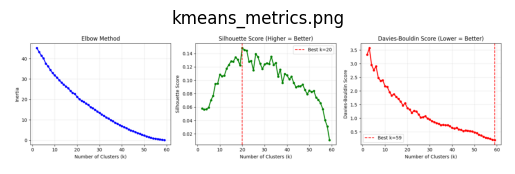

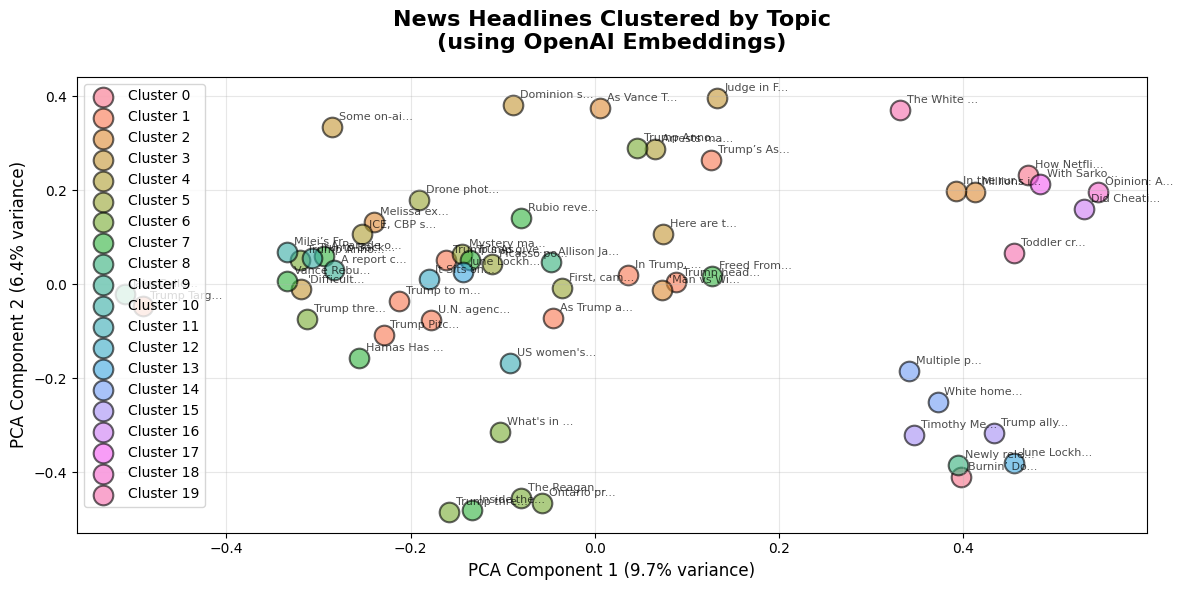

In [67]:
optimal_kmeans_classifier.visualize_clusters()

In [68]:
from src.classifier.dbscan import DBScanClassifier

precise_dbscan_classifier = DBScanClassifier(eps=0.18)
precise_dbscan_headlines = precise_dbscan_classifier.classify(unique_feeds)

2025-10-25 23:15:49,578 - src.embedding.embedding_generator - INFO - Initialized EmbeddingGenerator with model: text-embedding-3-small
2025-10-25 23:15:49,579 - src.classifier.dbscan - INFO - Initialized DBScanClassifier with eps=0.18, min_samples=2, model=text-embedding-3-small
2025-10-25 23:15:49,580 - src.classifier.dbscan - INFO - Generating embeddings for 60 headlines...
2025-10-25 23:15:49,582 - src.embedding.embedding_generator - INFO - 60 cached, 0 new to fetch (model=text-embedding-3-small).


2025-10-25 23:15:49,586 - src.embedding.embedding_generator - INFO - Embeddings generated with shape (60, 1536). Cache size: 376
2025-10-25 23:15:49,591 - src.classifier.dbscan - INFO - DBSCAN found 4 clusters.
2025-10-25 23:15:49,592 - src.classifier.dbscan - INFO - Noise points (unclustered): 52
2025-10-25 23:15:49,592 - src.classifier.dbscan - INFO - 52 headlines are unique enough to stand alone. Consider increasing eps (currently 0.18) to cluster more tightly related items.
2025-10-25 23:15:49,593 - src.classifier.dbscan - INFO - Generated 56 total HeadlineEntry objects.


In [69]:
moderate_dbscan_classifier = DBScanClassifier(eps=0.35)
moderate_dbscan_headlines = moderate_dbscan_classifier.classify(unique_feeds)

2025-10-25 23:15:53,386 - src.embedding.embedding_generator - INFO - Initialized EmbeddingGenerator with model: text-embedding-3-small


2025-10-25 23:15:53,387 - src.classifier.dbscan - INFO - Initialized DBScanClassifier with eps=0.35, min_samples=2, model=text-embedding-3-small
2025-10-25 23:15:53,390 - src.classifier.dbscan - INFO - Generating embeddings for 60 headlines...
2025-10-25 23:15:53,391 - src.embedding.embedding_generator - INFO - 60 cached, 0 new to fetch (model=text-embedding-3-small).
2025-10-25 23:15:53,394 - src.embedding.embedding_generator - INFO - Embeddings generated with shape (60, 1536). Cache size: 376
2025-10-25 23:15:53,399 - src.classifier.dbscan - INFO - DBSCAN found 6 clusters.
2025-10-25 23:15:53,400 - src.classifier.dbscan - INFO - Noise points (unclustered): 38
2025-10-25 23:15:53,400 - src.classifier.dbscan - INFO - 38 headlines are unique enough to stand alone. Consider increasing eps (currently 0.35) to cluster more tightly related items.
2025-10-25 23:15:53,401 - src.classifier.dbscan - INFO - Generated 44 total HeadlineEntry objects.


In [70]:
broad_dbscan_classifier = DBScanClassifier(eps=0.5)
broad_dbscan_headlines = broad_dbscan_classifier.classify(unique_feeds)

2025-10-25 23:15:56,525 - src.embedding.embedding_generator - INFO - Initialized EmbeddingGenerator with model: text-embedding-3-small
2025-10-25 23:15:56,526 - src.classifier.dbscan - INFO - Initialized DBScanClassifier with eps=0.5, min_samples=2, model=text-embedding-3-small
2025-10-25 23:15:56,527 - src.classifier.dbscan - INFO - Generating embeddings for 60 headlines...
2025-10-25 23:15:56,528 - src.embedding.embedding_generator - INFO - 60 cached, 0 new to fetch (model=text-embedding-3-small).
2025-10-25 23:15:56,530 - src.embedding.embedding_generator - INFO - Embeddings generated with shape (60, 1536). Cache size: 376


2025-10-25 23:15:56,534 - src.classifier.dbscan - INFO - DBSCAN found 7 clusters.
2025-10-25 23:15:56,535 - src.classifier.dbscan - INFO - Noise points (unclustered): 30
2025-10-25 23:15:56,535 - src.classifier.dbscan - INFO - 30 headlines are unique enough to stand alone. Consider increasing eps (currently 0.5) to cluster more tightly related items.
2025-10-25 23:15:56,536 - src.classifier.dbscan - INFO - Generated 37 total HeadlineEntry objects.


In [71]:
loose_dbscan_classifier = DBScanClassifier(eps=0.65)
loose_dbscan_headlines = loose_dbscan_classifier.classify(unique_feeds)

2025-10-25 23:15:59,114 - src.embedding.embedding_generator - INFO - Initialized EmbeddingGenerator with model: text-embedding-3-small
2025-10-25 23:15:59,115 - src.classifier.dbscan - INFO - Initialized DBScanClassifier with eps=0.65, min_samples=2, model=text-embedding-3-small
2025-10-25 23:15:59,116 - src.classifier.dbscan - INFO - Generating embeddings for 60 headlines...
2025-10-25 23:15:59,116 - src.embedding.embedding_generator - INFO - 60 cached, 0 new to fetch (model=text-embedding-3-small).


2025-10-25 23:15:59,118 - src.embedding.embedding_generator - INFO - Embeddings generated with shape (60, 1536). Cache size: 376
2025-10-25 23:15:59,124 - src.classifier.dbscan - INFO - DBSCAN found 6 clusters.
2025-10-25 23:15:59,124 - src.classifier.dbscan - INFO - Noise points (unclustered): 18
2025-10-25 23:15:59,125 - src.classifier.dbscan - INFO - 18 headlines are unique enough to stand alone. Consider increasing eps (currently 0.65) to cluster more tightly related items.
2025-10-25 23:15:59,126 - src.classifier.dbscan - INFO - Generated 24 total HeadlineEntry objects.


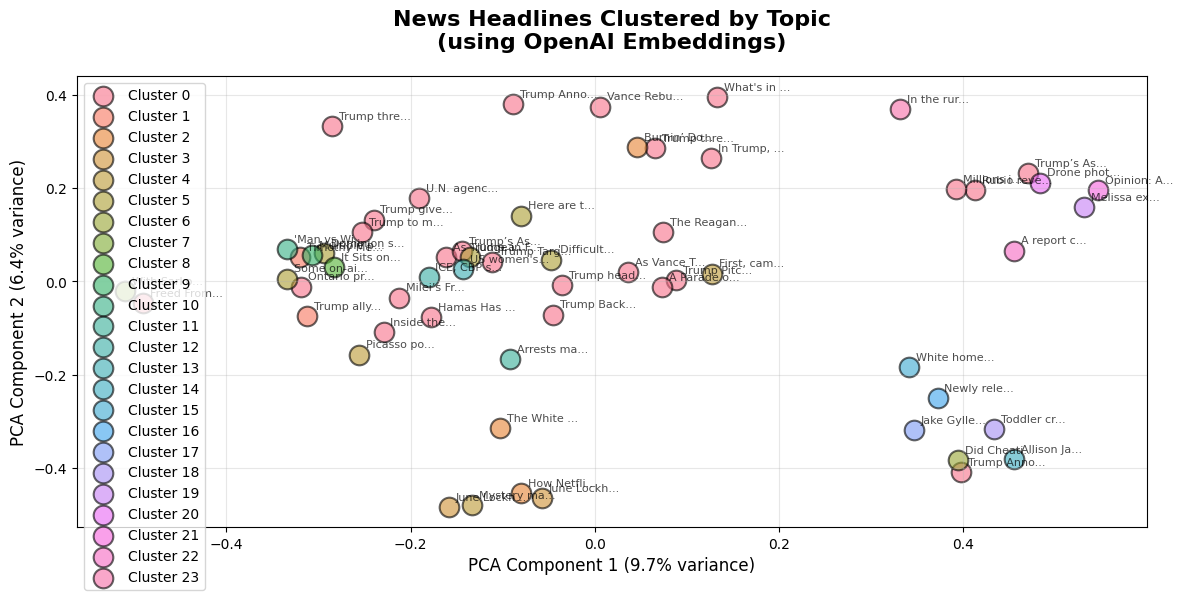

In [72]:
loose_dbscan_classifier.visualize_clusters()

In [73]:
from src.classifier.llm import LLMClassifier

llm_classifier = LLMClassifier()
headline_entries = llm_classifier.classify(unique_feeds)

2025-10-25 23:16:08,612 - src.classifier.llm - INFO - LLM classifying feed entry 2 / 10 for feed `NY Times - Top Stories` 1
2025-10-25 23:16:08,612 - src.classifier.llm - INFO - LLM classifying feed entry 3 / 10 for feed `NY Times - Top Stories` 1
2025-10-25 23:16:08,613 - src.classifier.llm - INFO - LLM classifying feed entry 4 / 10 for feed `NY Times - Top Stories` 1
2025-10-25 23:16:08,613 - src.classifier.llm - INFO - LLM classifying feed entry 5 / 10 for feed `NY Times - Top Stories` 1
2025-10-25 23:16:08,613 - src.classifier.llm - INFO - LLM classifying feed entry 6 / 10 for feed `NY Times - Top Stories` 1
2025-10-25 23:16:08,614 - src.classifier.llm - INFO - LLM classifying feed entry 7 / 10 for feed `NY Times - Top Stories` 1


2025-10-25 23:16:08,615 - src.classifier.llm - INFO - LLM classifying feed entry 8 / 10 for feed `NY Times - Top Stories` 1
2025-10-25 23:16:08,615 - src.classifier.llm - INFO - LLM classifying feed entry 9 / 10 for feed `NY Times - Top Stories` 1
2025-10-25 23:16:12,602 - httpx - INFO - HTTP Request: POST https://api.openai.com/v1/responses "HTTP/1.1 200 OK"
2025-10-25 23:16:12,640 - httpx - INFO - HTTP Request: POST https://api.openai.com/v1/responses "HTTP/1.1 200 OK"
2025-10-25 23:16:12,652 - httpx - INFO - HTTP Request: POST https://api.openai.com/v1/responses "HTTP/1.1 200 OK"
2025-10-25 23:16:12,679 - httpx - INFO - HTTP Request: POST https://api.openai.com/v1/responses "HTTP/1.1 200 OK"
2025-10-25 23:16:12,778 - src.classifier.llm - INFO - LLM classifying feed entry 10 / 10 for feed `NY Times - Top Stories` 1
2025-10-25 23:16:12,790 - src.classifier.llm - INFO - LLM classifying feed entry 1 / 10 for feed `WSJ - World` 2
2025-10-25 23:16:12,873 - httpx - INFO - HTTP Request: POS


Classifier Comparison Report
                        num_groups  total_items  mean_size  median_size  \
Optimal KMeans (20)           20.0         60.0      3.000          2.0   
Precise DBSCAN (0.18)         56.0         60.0      1.071          1.0   
Moderate DBSCAN (0.35)        44.0         60.0      1.364          1.0   
Broad DBSCAN (0.5)            37.0         60.0      1.622          1.0   
Loose DBSCAN (0.65)           24.0         60.0      2.500          1.0   
LLM Classification            43.0         60.0      1.395          1.0   

                        std_size  min_size  max_size  size_entropy  
Optimal KMeans (20)        2.324       1.0       9.0         2.733  
Precise DBSCAN (0.18)      0.258       1.0       2.0         4.002  
Moderate DBSCAN (0.35)     1.130       1.0       6.0         3.574  
Broad DBSCAN (0.5)         1.821       1.0      10.0         3.257  
Loose DBSCAN (0.65)        5.196       1.0      27.0         2.321  
LLM Classification         1.5

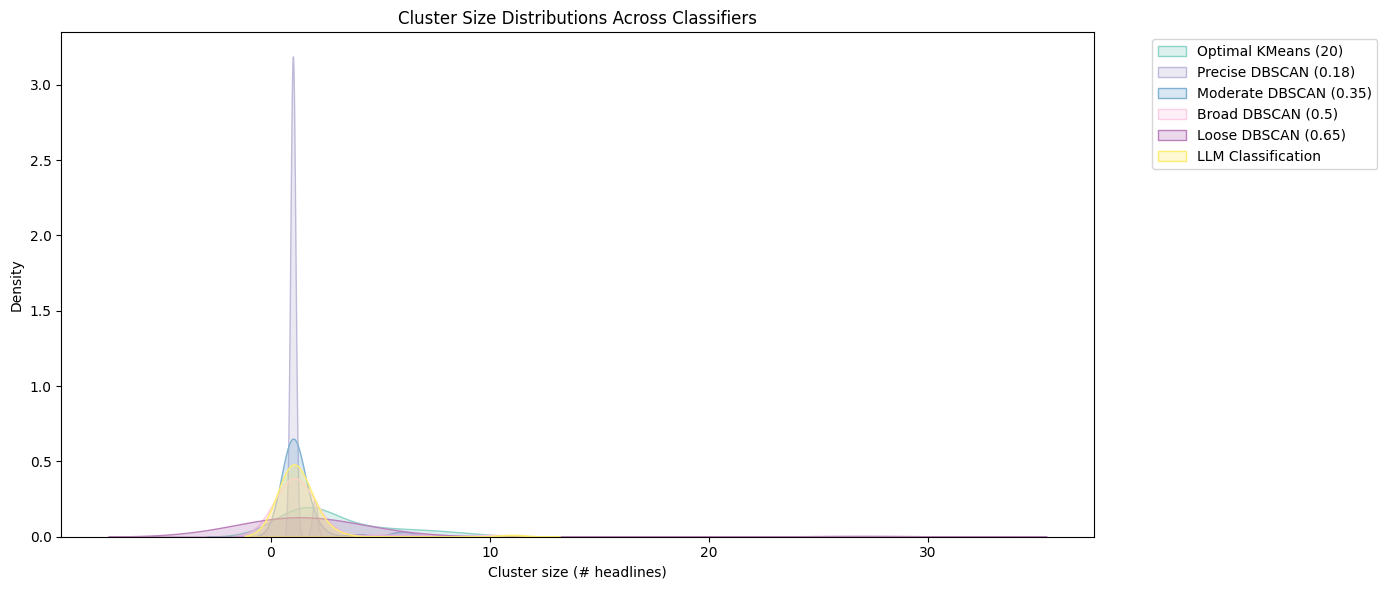

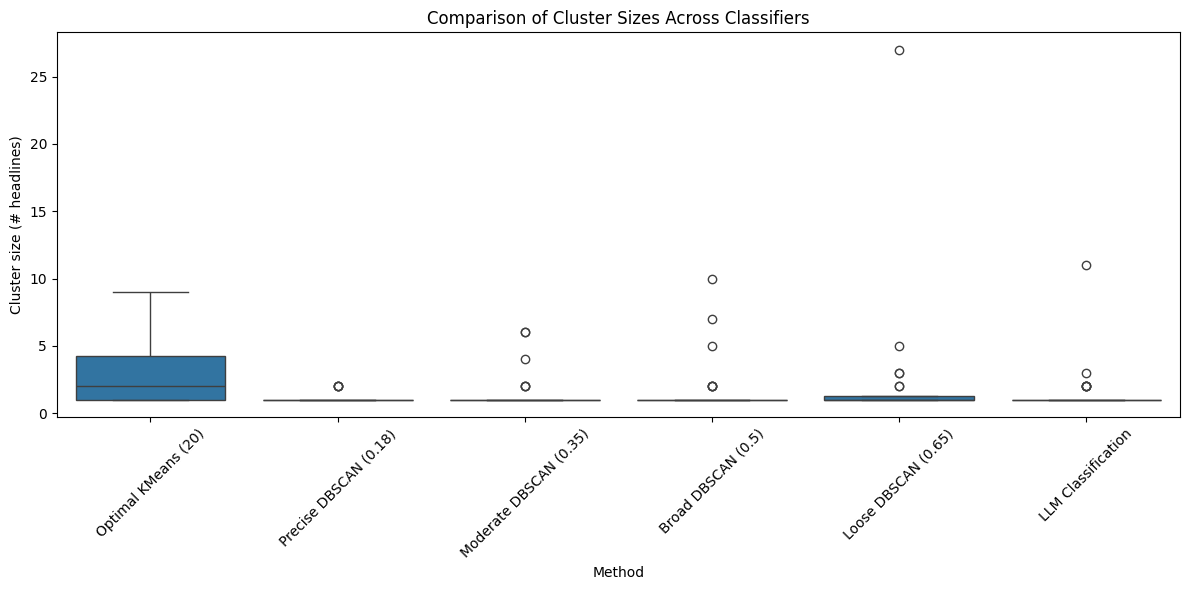

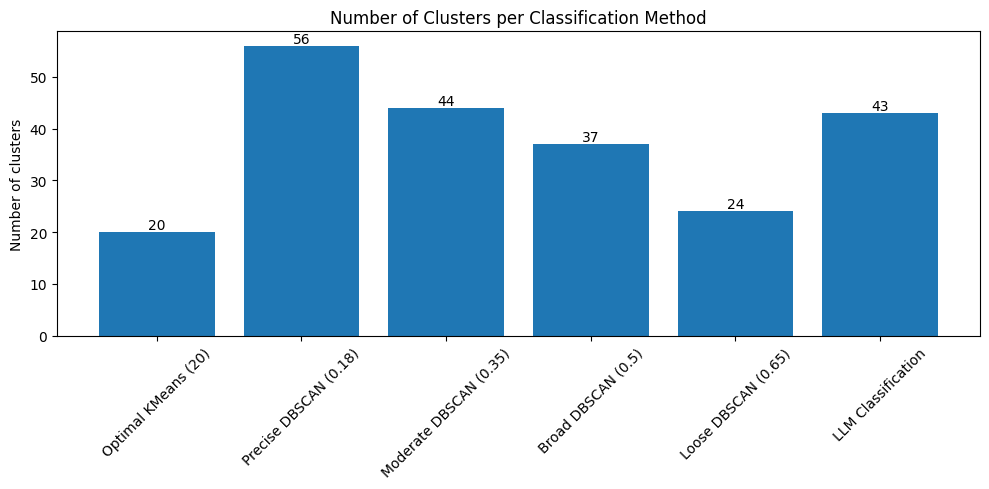

In [77]:
from src.comparison.report import classifier_comparison_report 

classifications = {
    'Optimal KMeans (20)': optimal_kmeans_headlines,
    'Precise DBSCAN (0.18)': precise_dbscan_headlines,
    'Moderate DBSCAN (0.35)': moderate_dbscan_headlines,
    'Broad DBSCAN (0.5)': broad_dbscan_headlines,
    'Loose DBSCAN (0.65)': loose_dbscan_headlines,
    'LLM Classification': headline_entries
}

classifier_comparison_report(classifications)
